#UAS KELOMPOK 3 JST ALGORITMA MLP BACKPROPAGATION
Anggota :
1. Nabila Kurnia Aprianti (09021182227003)
2. Revalina Ramadhani (09021182227007)
3. Zweta Anggun Syafara (09021182227010)
4. Evan Febrian (09021182227033)
5. Putri Hidayahni (09021282227060)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive

In [6]:
# Fungsi sigmoid untuk aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

# Baca dataset dari Google Drive
file_path = '/content/drive/MyDrive/DATASET JST/dataR2.csv'  # Ganti dengan path sesuai lokasi file di Drive Anda
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Pembersihan kolom
df.columns = df.columns.str.strip()

In [9]:
# Pisahkan fitur dan target
X = df.drop(columns=['Classification'])
y = df['Classification'].map({1: 1, 2: 0})  # Ubah label 1->1, 2->0

In [10]:
# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Tampilkan data awal setelah normalisasi (5 baris pertama)
print("\nData Training Setelah Normalisasi (5 Baris Pertama):")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled_df.head())
print(" ")


Data Training Setelah Normalisasi (5 Baris Pertama):
        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.307692  0.127539  0.122137  0.091401  0.044497  0.113750     0.512972   
1  0.338462  0.131274  0.137405  0.017634  0.009552  0.099559     0.464325   
2  0.446154  0.982966  0.236641  0.138199  0.082592  0.266062     0.505002   
3  0.461538  0.646401  0.152672  0.055419  0.029389  0.093289     0.221948   
4  0.153846  0.313374  0.167939  0.343882  0.179945  0.144521     0.554302   

   Resistin     MCP.1  
0  0.056154  0.010751  
1  0.131195  0.154525  
2  0.089404  0.393266  
3  0.088516  0.715278  
4  0.112249  0.263891  
 


In [13]:
# Inisialisasi MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(3,),  # 3 neuron di hidden layer
    activation='logistic',    # Fungsi sigmoid
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1,
    random_state=42,
    warm_start=True
)

In [14]:
# Pelatihan dengan penghentian berdasarkan MSE <= 0.2
mse_threshold = 0.1
max_iterations = 500
loss_history = []

for i in range(max_iterations):
    mlp.partial_fit(X_train_scaled, y_train, classes=[0, 1])
    y_pred_proba = mlp.predict_proba(X_train_scaled)[:, 1]
    mse = mean_squared_error(y_train, y_pred_proba)
    loss_history.append(mlp.loss_)
    print(f"Iterasi {i+1}, MSE: {mse:.4f}, Loss: {mlp.loss_:.4f}")
    if mse <= mse_threshold:
        print(f"Pelatihan dihentikan pada iterasi {i+1}.")
        break

Iterasi 1, MSE: 0.2576, Loss: 0.7125
Iterasi 2, MSE: 0.2557, Loss: 0.7084
Iterasi 3, MSE: 0.2539, Loss: 0.7045
Iterasi 4, MSE: 0.2523, Loss: 0.7010
Iterasi 5, MSE: 0.2508, Loss: 0.6977
Iterasi 6, MSE: 0.2495, Loss: 0.6947
Iterasi 7, MSE: 0.2483, Loss: 0.6921
Iterasi 8, MSE: 0.2473, Loss: 0.6897
Iterasi 9, MSE: 0.2464, Loss: 0.6877
Iterasi 10, MSE: 0.2457, Loss: 0.6859
Iterasi 11, MSE: 0.2451, Loss: 0.6845
Iterasi 12, MSE: 0.2446, Loss: 0.6833
Iterasi 13, MSE: 0.2442, Loss: 0.6823
Iterasi 14, MSE: 0.2440, Loss: 0.6816
Iterasi 15, MSE: 0.2438, Loss: 0.6810
Iterasi 16, MSE: 0.2437, Loss: 0.6806
Iterasi 17, MSE: 0.2436, Loss: 0.6804
Iterasi 18, MSE: 0.2435, Loss: 0.6802
Iterasi 19, MSE: 0.2435, Loss: 0.6800
Iterasi 20, MSE: 0.2434, Loss: 0.6799
Iterasi 21, MSE: 0.2434, Loss: 0.6798
Iterasi 22, MSE: 0.2433, Loss: 0.6797
Iterasi 23, MSE: 0.2432, Loss: 0.6795
Iterasi 24, MSE: 0.2431, Loss: 0.6793
Iterasi 25, MSE: 0.2429, Loss: 0.6791
Iterasi 26, MSE: 0.2427, Loss: 0.6787
Iterasi 27, MSE: 0.24

In [15]:
# Tampilkan bobot dan bias
print("\nBobot Lapisan Tersembunyi:\n", mlp.coefs_[0])
print("\nBias Lapisan Tersembunyi:\n", mlp.intercepts_[0])
print("\nBobot Lapisan Keluaran:\n", mlp.coefs_[1])
print("\nBias Lapisan Keluaran:\n", mlp.intercepts_[1])


Bobot Lapisan Tersembunyi:
 [[ 4.44153758 -0.49589364 -0.05855662]
 [ 5.1752611  -0.30194301 -0.7277517 ]
 [-5.43840376  4.96922514  4.23562975]
 [-2.22085807  1.89553736  1.46838162]
 [-2.66543675  2.51437752  1.46543934]
 [ 4.77710843 -1.43534957  0.33586864]
 [ 5.89853641 -1.63243224  3.36367935]
 [-5.96043312  0.7679065   3.72155863]
 [-3.96741211  0.54064351 -2.16900873]]

Bias Lapisan Tersembunyi:
 [-1.46650866 -0.69143944 -0.41712512]

Bobot Lapisan Keluaran:
 [[ 3.49627478]
 [-2.93963123]
 [-3.52182033]]

Bias Lapisan Keluaran:
 [0.64447635]


In [16]:
# Hitung Z-net, Z (aktivasi), Y-net, dan Y-prediksi untuk 5 sampel pertama
X_sample = X_train_scaled[:5]
weights_hidden = mlp.coefs_[0]
bias_hidden = mlp.intercepts_[0]
weights_output = mlp.coefs_[1]
bias_output = mlp.intercepts_[1]

# Z-net = X * W + b
Z_net = np.dot(X_sample, weights_hidden) + bias_hidden
Z_activated = sigmoid(Z_net)  # Aktivasi sigmoid
Y_net = np.dot(Z_activated, weights_output) + bias_output
Y_pred = sigmoid(Y_net)


In [17]:
# Tampilkan hasil
print("\nZ-net (5 Sampel Pertama):\n", Z_net)
print("\nZ-activated (Hidden Layer, 5 Sampel):\n", Z_activated)
print("\nY-net (Sebelum Aktivasi Output, 5 Sampel):\n", Y_net)
print("\nY-prediksi (Probabilitas, 5 Sampel):\n", Y_pred)


Z-net (5 Sampel Pertama):
 [[ 2.76616888 -0.9421982   2.1381305 ]
 [ 1.72367218 -0.87527209  1.83777096]
 [ 5.94483534 -0.48893589  1.43543127]
 [ 1.2864536  -0.21942218 -0.5876    ]
 [ 0.92587393  0.19303482  2.58417827]]

Z-activated (Hidden Layer, 5 Sampel):
 [[0.94082004 0.28045653 0.8945544 ]
 [0.84860123 0.29415848 0.86268487]
 [0.99738751 0.38014428 0.80774616]
 [0.78354632 0.44536349 0.35718571]
 [0.71623745 0.54810941 0.92983635]]

Y-net (Sebelum Aktivasi Output, 5 Sampel):
 [[-0.0410569 ]
 [-0.29151911]
 [ 0.16939632]
 [ 0.81682125]
 [-1.73731683]]

Y-prediksi (Probabilitas, 5 Sampel):
 [[0.48973722]
 [0.427632  ]
 [0.5422481 ]
 [0.69356116]
 [0.14965407]]


In [18]:
# Evaluasi model pada data training dan testing
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nAkurasi Pelatihan: {train_accuracy:.4f}")
print(f"Akurasi Testing: {test_accuracy:.4f}")
print(f"MSE Pelatihan: {train_mse:.4f}")
print(f"MSE Testing: {test_mse:.4f}")
print("\nLaporan Klasifikasi (Data Training):")
print(classification_report(y_train, y_train_pred))
print("\nLaporan Klasifikasi (Data Testing):")
print(classification_report(y_test, y_test_pred))


Akurasi Pelatihan: 0.7826
Akurasi Testing: 0.9583
MSE Pelatihan: 0.2174
MSE Testing: 0.0417

Laporan Klasifikasi (Data Training):
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        52
           1       0.72      0.82      0.77        40

    accuracy                           0.78        92
   macro avg       0.78      0.79      0.78        92
weighted avg       0.79      0.78      0.78        92


Laporan Klasifikasi (Data Testing):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



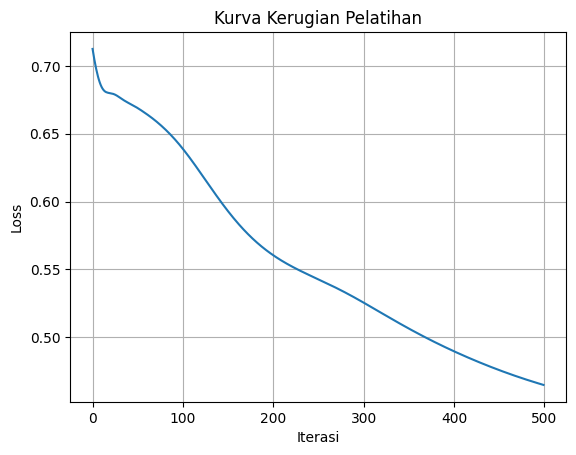

In [19]:
# Visualisasi kurva loss
plt.plot(loss_history)
plt.title('Kurva Kerugian Pelatihan')
plt.xlabel('Iterasi')
plt.ylabel('Loss')
plt.grid(True)
plt.show()